# Tomek Links

Tomek links là hai mẫu từ hai lớp khác nhau, và chúng là láng giềng gần nhất của nhau. Nói cách khác, nếu hai quan sát là láng giềng gần nhất và thuộc hai lớp khác nhau, chúng được coi là Tomek links.

Phương pháp này loại bỏ entweder mẫu từ lớp đa số nếu nó là một Tomek Link, hoặc cả hai quan sát, một từ lớp đa số và một từ lớp thiểu số.

Tiêu chí cho việc loại bỏ dữ liệu: Các mẫu là Tomek Links.
Kích thước bộ dữ liệu cuối cùng: thay đổi tùy thuộc vào số lượng Tomek Links và quyết định loại bỏ



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

from imblearn.under_sampling import TomekLinks

## Create data


In [2]:
def make_data(sep):
    
    # returns arrays
    X, y = make_classification(n_samples=1000,
                           n_features=2,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           weights=[0.99],
                           class_sep=sep,# how separate the classes are
                           random_state=1)
    
    # trasform arrays into pandas df and series
    X = pd.DataFrame(X, columns =['varA', 'varB'])
    y = pd.Series(y)
    
    return X, y

## Undersample with Tomek Links

[TomekLinks](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.TomekLinks.html)



In [4]:
# create data

X, y = make_data(sep=2)

# set up Tomek Links

tl = TomekLinks(
    sampling_strategy='auto',  # undersamples only the majority class
    n_jobs=4)  # I have 4 cores in my laptop

X_resampled, y_resampled = tl.fit_resample(X, y)

In [5]:
# size of original data

X.shape, y.shape

((1000, 2), (1000,))

In [6]:
# size of undersampled data

X_resampled.shape, y_resampled.shape

((994, 2), (994,))

In [7]:
# number of minority class observations

y.value_counts()

0    983
1     17
dtype: int64

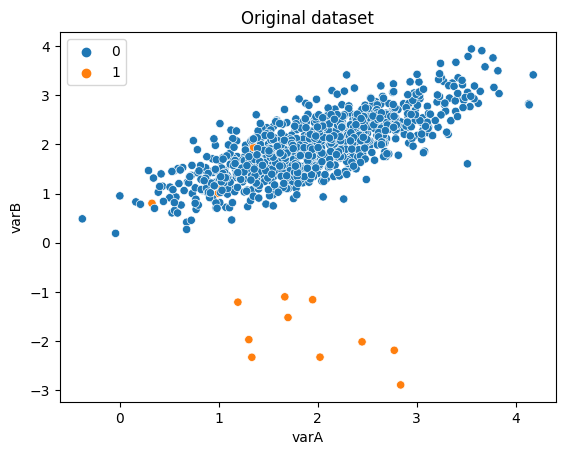

In [8]:
sns.scatterplot(
    data=X, x="varA", y="varB", hue=y
)

plt.title('Original dataset')
plt.show()

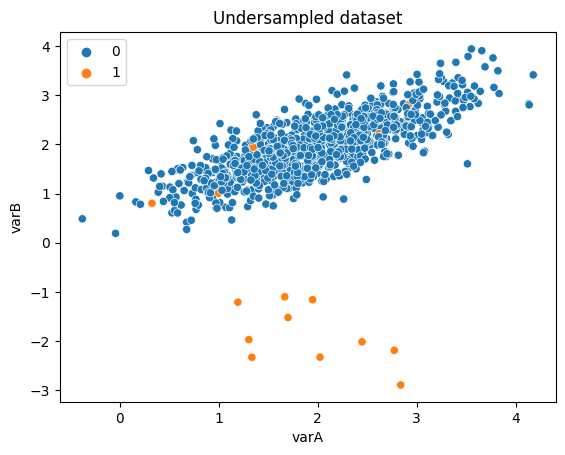

In [9]:
# plot undersampled data

sns.scatterplot(
    data=X_resampled, x="varA", y="varB", hue=y_resampled
)

plt.title('Undersampled dataset')
plt.show()

### Partially separated classes

In [9]:
# create data
X, y = make_data(sep=0.5)

# set up Tomek Links

tl = TomekLinks(
    sampling_strategy='auto',  # undersamples only the majority class
    n_jobs=4)  # I have 4 cores in my laptop

X_resampled, y_resampled = tl.fit_resample(X, y)

In [10]:
# original data

X.shape, y.shape

((1000, 2), (1000,))

In [10]:
y.value_counts()

0    983
1     17
dtype: int64

In [11]:
# undersampled data

X_resampled.shape, y_resampled.shape

((988, 2), (988,))

In [11]:
y_resampled.value_counts()

0    977
1     17
dtype: int64

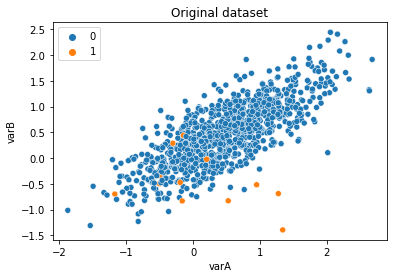

In [12]:
sns.scatterplot(
    data=X, x="varA", y="varB", hue=y
)

plt.title('Original dataset')
plt.show()

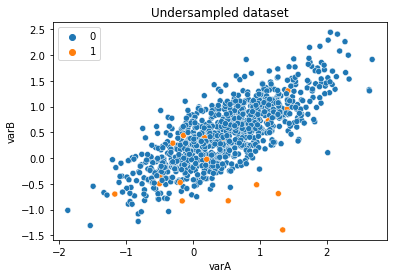

In [13]:
# plot undersampled data

sns.scatterplot(
    data=X_resampled, x="varA", y="varB", hue=y_resampled
)

plt.title('Undersampled dataset')
plt.show()